In [1]:
%matplotlib inline

In [2]:
from numpy import genfromtxt
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [3]:
X_train = genfromtxt('notMNIST_train_data.csv', delimiter=',')
Y_train = genfromtxt('notMNIST_train_labels.csv', delimiter=',')
X_test = genfromtxt('notMNIST_test_data.csv', delimiter=',')
Y_test = genfromtxt('notMNIST_test_labels.csv', delimiter=',')
# print X_train.shape

In [4]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [5]:
n = randint(1, 1000)
# n=10
label = Y_test[n]
im = X_test[n, :].reshape((28, 28))
print(label)
showarray(im)

0.0


In [6]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)

<type 'numpy.ndarray'>
(2622, 784)
(1124, 784)


In [7]:
logreg = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
Y_pred = logreg.predict(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

f1 = f1_score(Y_test, Y_pred)
print("F1_score: ", f1)

accuracy = accuracy_score(Y_test, Y_pred)
print accuracy

('F1_score: ', 0.93766461808604051)
0.936832740214


accuracy_score: train: 1.000000 val: 0.939024
best_C: train: 1.000000 val: 0.001000


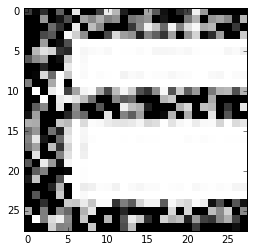

In [38]:
# Experiments
x_values = []
y_values = []
train_scores_l2 = []
val_scores_l2 = []

C_count = 1000.0

for i in range(1,int(C_count)+1):
    C = i/(C_count)
#     print "Value of C is: ", C
    
    LogReg = linear_model.LogisticRegression(C=C)
    LogReg.fit(X_train, Y_train) 
    Yval_predict = LogReg.predict(X_val)
    Ytrain_predict = LogReg.predict(X_train)

    train_score = accuracy_score(Y_train, Ytrain_predict)
    val_score = accuracy_score(Y_val, Yval_predict)
    x_values.append(C)
    train_scores_l2.append(train_score)
    val_scores_l2.append(val_score)
    
    vis = LogReg.coef_ * X_val[0,:]
    coef_l1_LR = LogReg.coef_.ravel()
    plt.imshow(np.abs(vis.reshape(28, 28)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
    save_name = 'l2/activation_val_'+str(C) +'.png'
    plt.savefig(save_name)
    
#     print "C: ", C, " accuracy_score: train: ", train_score, "val: ",val_score


max_train_accuracy_l2 = max(train_scores_l2)
max_train_accuracy_indices = [i for i, x in enumerate(train_scores_l2) if x == max_train_accuracy_l2]
max_train_accuracy_index = max_train_accuracy_indices[-1]
best_train_C_l2 = (max_train_accuracy_index + 1) / C_count

max_val_accuracy_l2 = max(val_scores_l2)
max_val_accuracy_indices = [i for i, x in enumerate(val_scores_l2) if x == max_val_accuracy_l2]
max_val_accuracy_index = max_val_accuracy_indices[-1]
best_val_C_l2 = (max_val_accuracy_index + 1) / C_count
print "accuracy_score: train: %f val: %f" % (max_train_accuracy_l2, max_val_accuracy_l2)
print "best_C: train: %f val: %f" % (best_train_C_l2, best_val_C_l2)

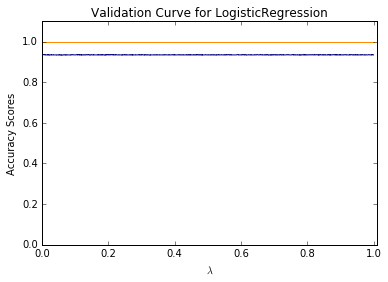

In [39]:
# print val_scores_l2
# print x_values
plt.title("Validation Curve for LogisticRegression")
plt.xlabel("$\lambda$")
plt.ylabel("Accuracy Scores")
plt.ylim(0.0,1.1)
plt.xlim(0.0,1.01)
plt.plot(x_values, train_scores_l2, label="Training_accuracies", color="darkorange")
plt.plot(x_values, val_scores_l2, label="val_accuracies", color="navy")
plt.savefig("l2_accuracies.png")

accuracy_score: train: 1.000000 val: 0.954268
best_C: train: 1.000000 val: 0.002000


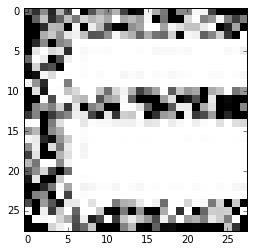

In [40]:
# Experiments
x_values = []
y_values = []
train_scores_l1 = []
val_scores_l1 = []

# C_count = 1000.0

for i in range(1,int(C_count)+1):
    C = i/(C_count)
#     print "Value of C is: ", C
    
    LogReg = linear_model.LogisticRegression(C=C, penalty='l1')
    LogReg.fit(X_train, Y_train) 
    Yval_predict = LogReg.predict(X_val)
    Ytrain_predict = LogReg.predict(X_train)

    train_score = accuracy_score(Y_train, Ytrain_predict)
    val_score = accuracy_score(Y_val, Yval_predict)
    x_values.append(C)
    train_scores_l1.append(train_score)
    val_scores_l1.append(val_score)
    
    vis = LogReg.coef_ * X_val[0,:]
    coef_l1_LR = LogReg.coef_.ravel()
    plt.imshow(np.abs(vis.reshape(28, 28)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
    save_name = 'l1/activation_val_'+str(C) +'.png'
    plt.savefig(save_name)
    
#     print "C: ", C, " accuracy_score: train: ", train_score, "val: ",val_score

max_train_accuracy_l1 = max(train_scores_l1)
max_train_accuracy_indices = [i for i, x in enumerate(train_scores_l1) if x == max_train_accuracy_l1]
max_train_accuracy_index = max_train_accuracy_indices[-1]
best_train_C_l1 = (max_train_accuracy_index + 1) / C_count

max_val_accuracy_l1 = max(val_scores_l1)
max_val_accuracy_indices = [i for i, x in enumerate(val_scores_l1) if x == max_val_accuracy_l1]
max_val_accuracy_index = max_val_accuracy_indices[-1]
best_val_C_l1 = (max_val_accuracy_index + 1) / C_count
print "accuracy_score: train: %f val: %f" % (max_train_accuracy_l1, max_val_accuracy_l1)
print "best_C: train: %f val: %f" % (best_train_C_l1, best_val_C_l1)

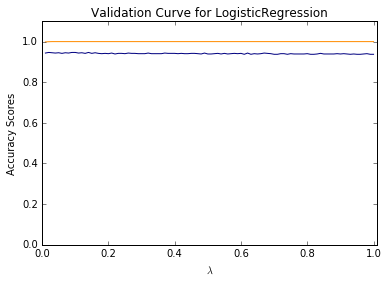

In [33]:
# print val_scores_l2
# print x_values
plt.title("Validation Curve for LogisticRegression")
plt.xlabel("$\lambda$")
plt.ylabel("Accuracy Scores")
plt.ylim(0.0,1.1)
plt.xlim(0.0,1.01)
plt.plot(x_values, train_scores_l1, label="Training_accuracies", color="darkorange")
plt.plot(x_values, val_scores_l1, label="val_accuracies", color="navy")
plt.savefig("l1_accuracies.png")

In [11]:
LogReg = linear_model.LogisticRegression(C=best_val_C_l1, penalty='l1')
LogReg.fit(X_train, Y_train)
Ytest_score = LogReg.predict(X_test)
score = accuracy_score(Y_test, Ytest_score)
print(score)

0.947508896797


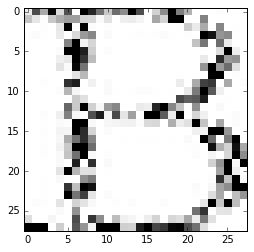

In [12]:
vis = LogReg.coef_ * X_test[0,:]

coef_l1_LR = LogReg.coef_.ravel()
plt.imshow(np.abs(vis.reshape(28, 28)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
save_name = 'l1_activation_test.png'
plt.savefig(save_name)

In [13]:
LogReg = linear_model.LogisticRegression(C=best_val_C_l2, penalty='l2')
LogReg.fit(X_train, Y_train)
Ytest_score = LogReg.predict(X_test)
score = accuracy_score(Y_test, Ytest_score)
print(score)

0.94128113879


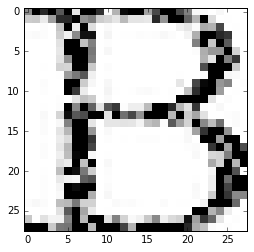

In [14]:
vis = LogReg.coef_ * X_test[0,:]

coef_l2_LR = LogReg.coef_.ravel()
plt.imshow(np.abs(vis.reshape(28, 28)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
save_name = 'l2_activation_test.png'
plt.savefig(save_name)

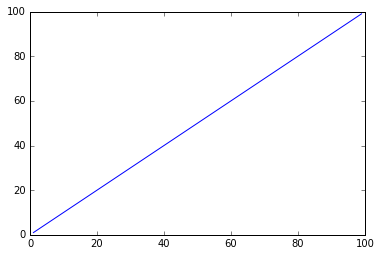

In [25]:
x = range(1,100)
y=range(1,100)
plt.plot(x,y)